In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

def linearData(n_sample=400):
	theta = np.random.rand() * 2 * np.pi
	w_star = np.array([[np.cos(theta), np.sin(theta)]])
	margin = 0.1
	noise = 0.1
	#  create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (X @ w_star.T) > 0
	label = label.astype(float)
	# create margin
	idx = (label * (X @ w_star.T)) < margin
	X = X + margin * ((idx * label) @ w_star)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def XORData(n_sample=400):
	margin = 0.1
	noise = 0.1
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (X[:, 0] * X[:, 1]) > 0
	label = label.astype(float).reshape((-1, 1))
	# create margin
	pos_flag = X >= 0
	X = X + 0.5 * margin * pos_flag
	X = X - 0.5 * margin * (~pos_flag)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def circleData(n_sample=400):
	noise = 0.05
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	dist = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
	label = dist <= 0.5
	label = label.astype(float).reshape((-1, 1))
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def sinusoidData(n_sample=400):
	noise = 0.05
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (np.sin(np.sum(X, axis=- 1) * 2 * np.pi) > 0)
	label = label.astype(float).reshape((-1, 1))
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def swissrollData(n_sample=400):
	noise = 0.05
	nHalf = int(n_sample / 2)
	# create data
	t = np.random.rand(nHalf, 1)
	x1 = t * np.cos(2 * np.pi * t * 2)
	y1 = t * np.sin(2 * np.pi * t * 2)
	t = np.random.rand(n_sample - nHalf, 1)
	x2 = (-t) * np.cos(2 * np.pi * t * 2)
	y2 = (-t) * np.sin(2 * np.pi * t * 2)
	xy1 = np.concatenate([x1, y1], axis=1)
	xy2 = np.concatenate([x2, y2], axis=1)
	X = np.concatenate([xy1, xy2], axis=0)
	label = np.concatenate([np.ones((nHalf, 1)), np.zeros((n_sample - nHalf, 1))], axis=0)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def sample_data(data_name='circle', nTrain=200, nTest=200, random_seed=0,):
	"""
	Data generation function
	:param data_name: linear-separable, XOR, circle, sinusoid, swiss-roll
	:return:
	"""
	random.seed(random_seed)
	np.random.seed(random_seed)
	n_sample = nTrain + nTest
	if data_name == 'linear-separable':
		X, label = linearData(n_sample)
	elif data_name == 'XOR':
		X, label = XORData(n_sample)
	elif data_name == 'circle':
		X, label = circleData(n_sample)
	elif data_name == 'sinusoid':
		X, label = sinusoidData(n_sample)
	elif data_name == 'swiss-roll':
		X, label = swissrollData(n_sample)
	else:
		raise NotImplementedError


	indices = np.random.permutation(n_sample)
	train_idx, test_idx = indices[:nTrain], indices[nTrain:]
	x_train = X[train_idx]
	y_train = label[train_idx]
	x_test = X[test_idx]
	y_test = label[test_idx]
	return x_train, y_train, x_test, y_test


def plot_loss(logs):
	"""
	Function to plot training and validation/test loss curves
	:param logs: dict with keys 'train_loss','test_loss' and 'epochs', where train_loss and test_loss are lists with 
				the training and test/validation loss for each epoch
	"""
	plt.figure(figsize=(20, 8))
	plt.subplot(1, 2, 1)
	t = np.arange(len(logs['train_loss']))
	plt.plot(t, logs['train_loss'], label='train_loss', lw=3)
	plt.plot(t, logs['test_loss'], label='test_loss', lw=3)
	plt.grid(1)
	plt.xlabel('epochs',fontsize=15)
	plt.ylabel('loss value',fontsize=15)
	plt.legend(fontsize=15)

def plot_decision_boundary(X, y, pred_fn, boundry_level=None):
    """
    Plots the decision boundary for the model prediction
    :param X: input data
    :param y: true labels
    :param pred_fn: prediction function,  which use the current model to predict。. i.e. y_pred = pred_fn(X)
    :boundry_level: Determines the number and positions of the contour lines / regions.
    :return:
    """
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = pred_fn(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, levels=boundry_level, cmap='viridis_r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), alpha=0.7,s=50, cmap='viridis_r',)


In [23]:
class MLP:
    def __init__(self, num_layers, num_width, opt_act, opt_init):
        self.num_layers = num_layers
        self.params = self.init_params(num_layers, num_width, opt_init)
        self.activation_funcs = opt_act

    def init_params(self, num_layers, num_width, opt_init):
        params = {}
        for i in range(1, num_layers):
            n_in = num_width[i - 1]
            n_out = num_width[i]

            if (opt_init == 'xavier'):
                deviation = np.sqrt(2. / (n_in + n_out))
            elif (opt_init == 'he'):
                deviation = np.sqrt(2. / n_in)   # uisng the default fan_mode

            params['W' + str(i)] = np.random.randn(n_out, n_in) * deviation
            params['b' + str(i)] = np.zeros((num_width[i], 1))
        return params

def relu(U):
    return np.maximum(0, U)

def relu_derivative(U):
    return U > 0

def sigmoid(U):
    return 1 / (1 + np.exp(-U))

def sigmoid_derivative(U):
    s = sigmoid(U)
    return s * (1 - s)

def tanh(U):
    return np.tanh(U)

def tanh_derivative(U):
    return 1 - np.tanh(U)**2

def linear(U):
    return U

def linear_derivative(U):
    return np.ones_like(U)

def forward(mlp, X):
    cache = {'A0': X}
    A = X
    for l in range(1, mlp.num_layers):
        U = mlp.params['W' + str(l)].dot(A) + mlp.params['b' + str(l)]
        if mlp.activation_funcs[l-1] == 'relu':
            A = relu(U)
        elif mlp.activation_funcs[l-1] == 'sigmoid':
            A = sigmoid(U)
        elif mlp.activation_funcs[l-1] == 'tanh':
            A = tanh(U)
        elif mlp.activation_funcs[l-1] == 'linear':
            A = linear(U)
        
        # cache the u and y of each layer for back propagation
        cache['A' + str(l)] = A
        cache['U' + str(l)] = U
        
    return A, cache


def loss(AL, Y, loss_type):
    m = Y.shape[1]
    if loss_type == 'cross_entropy':
        loss = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    elif loss_type == 'L2':
        loss = np.sum((AL - Y)**2) / m
    return loss

def backward(mlp, X, Y, cache, loss_type):
    gradients = {}
    m = X.shape[1]
    # the output layer value is cached
    AL = cache['A' + str(mlp.num_layers - 1)]
    print("AL shape: ", AL.shape)
    print("Y shape: ", Y.shape)
    if loss_type == 'cross_entropy':
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    elif loss_type == 'L2':
        dAL = 2 * (AL - Y)
    else:
        raise ValueError("Invalid loss function")

    for l in reversed(range(1, mlp.num_layers)):
        if mlp.activation_funcs[l-1] == 'relu':
            del_k = dAL * relu_derivative(cache['U' + str(l)])
        elif mlp.activation_funcs[l-1] == 'sigmoid':
            del_k = dAL * sigmoid_derivative(cache['U' + str(l)])
        elif mlp.activation_funcs[l-1] == 'tanh':
            del_k = dAL * tanh_derivative(cache['U' + str(l)])
        elif mlp.activation_funcs[l-1] == 'linear':
            del_k = dAL * linear_derivative(cache['U' + str(l)])
        else:
            raise ValueError("Invalid activation function")

        dW = 1./m * np.dot(del_k, cache['A' + str(l-1)].T)  # need tranpose to match the shape
        db = 1./m * np.sum(del_k, axis=1, keepdims=True)

        # We already have del_k (contains g'(k)), so we can multiply it with W to get del_j
        # where del_j is for the previous layer
        if l > 1:
            print("dAL shape: ", dAL.shape)
            print(mlp.params['W' + str(l)].T)
            print(del_k)
            dA_prev = np.dot(mlp.params['W' + str(l)].T, del_k)
            dAL = dA_prev

        gradients['dW' + str(l)] = dW
        gradients['db' + str(l)] = db

    return gradients


def update_mlp(params, gradients, learning_rate):
    # assuming exactly half the number of params are weights
    for l in range(1, len(params) // 2):
        params['W' + str(l)] -= learning_rate * gradients['dW' + str(l)]
        params['b' + str(l)] -= learning_rate * gradients['db' + str(l)]
    return params

def train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, loss_type):
    X_train = X_train.T
    X_val = X_val.T
    Y_train = Y_train.T
    Y_val = Y_val.T

    train_loss = []
    val_loss = []
    for epoch in range(num_epochs):
        AL, cache = forward(mlp, X_train)
        loss_res = loss(AL, Y_train, loss_type)
        train_loss.append(loss_res)
        gradients = backward(mlp, X_train, Y_train, cache, loss_type)
        mlp.params = update_mlp(mlp.params, gradients, learning_rate)

        # validation loss
        AL_val, _ = forward(mlp, X_val)
        val_loss.append(loss(AL_val, Y_val, loss_type))

    final_AL, _ = forward(mlp, X_train)
    final_train_loss = loss(final_AL, Y_train, loss_type)
    final_train_acc = np.mean((final_AL > 0.5) == Y_train)
    return final_train_loss, final_train_acc, train_loss, val_loss

def test_mlp(mlp, X, Y, loss_type):
    X = X.T
    Y = Y.T

    AL, _ = forward(mlp, X)
    test_loss = loss(AL, Y, loss_type)
    pred = AL > 0.5
    correct = np.sum(pred == Y)
    test_acc = np.mean(correct)
    return test_loss, test_acc


AL shape:  (1, 200)
Y shape:  (1, 200)
dAL shape:  (1, 200)
[[0.57485236]]
[[ 0.18853695  0.24761122  0.21542795  0.11166185 -0.24637334  0.23715813
   0.19358754 -0.0981563   0.143422    0.11498595  0.19899644  0.23969865
   0.24833644  0.13343588 -0.20064711  0.19950231 -0.22396001  0.20927725
   0.19042326  0.22080687 -0.23370197 -0.17351219  0.23157696 -0.14127732
  -0.23219454  0.21486471 -0.13626095 -0.19067314 -0.18651559 -0.15646389
  -0.18500245 -0.13190654 -0.24805849 -0.19210906 -0.21278676  0.21636965
   0.20869574 -0.11953925 -0.14170245 -0.15038287 -0.18140697  0.19038004
  -0.19924457 -0.16610368  0.16211615  0.25066564  0.22145182 -0.19109347
  -0.17624075 -0.15546133 -0.21718677  0.17651759  0.21926687 -0.22003219
   0.15554242  0.15413711 -0.23245736  0.2354858   0.19367222  0.18569438
   0.20355007  0.21707111 -0.22365211 -0.21533622 -0.21372426 -0.18409498
  -0.20313251  0.21813368  0.21061276  0.22295848 -0.20378429  0.12405576
   0.2473194   0.13198662  0.16750127

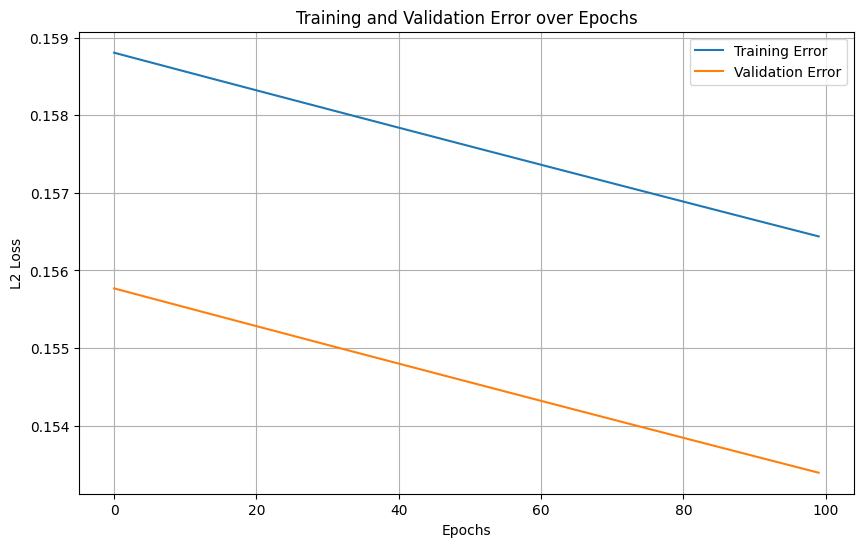

In [24]:
np.random.seed(0)
X, Y = linearData(400)
X_train, Y_train = X[:200, :], Y[:200]
X_val, Y_val = X[200:, :], Y[200:]

mlp = MLP(3, [2, 1, 1], ['linear', 'sigmoid'], 'xavier')

# Training parameters
num_epochs = 100
learning_rate = 0.01

final_train_loss, final_train_acc, train_loss, val_loss = train_mlp(mlp, X_train, Y_train, X_val, Y_val, num_epochs, learning_rate, 'L2')

# Plotting training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Error')
plt.plot(val_loss, label='Validation Error')
plt.title('Training and Validation Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('L2 Loss')
plt.legend()
plt.grid(True)
plt.show()